In [ ]:
import json
import matplotlib.pyplot as plt
from itertools import chain
import parse_T7
import os


In [ ]:
project_path = r'C:\Work\test_projects\mhd_krm_5f'
data = parse_T7.get_t7_data(os.path.join(project_path, "project_krm"))


In [ ]:
RK_I = data['header'].index("RK(I)")
VK_I = data['header'].index("VK(I)")
RK_I

In [ ]:
array = []
for key, item in data['data'].items():
    array.append(
        [float(key), [i[RK_I] for i in item], [i[VK_I] for i in item]]
    )

In [ ]:
x = [time for time, arr, vk in array]
y = [len(arr) for time, arr, vk in array]
a = [(index, i, len(j)) for index, (i, j, k) in enumerate(array)]
a

In [ ]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(max(y))

def scatter_plot(local_data, ax):
    _x_max = max([max(i[1]) for i in local_data])
    _x_min = min([min(i[1]) for i in local_data])
    _y_max = max([i[0] for i in local_data])
    _y_min = min([i[0] for i in local_data])

    # ax.set_xlim([_x_min, _x_max * 1.05])
    ax.set_xlim([0, 10])
    ax.set_ylim([_y_min, _y_max * 1.05])

    for i, (time, rk_arr, vk_arr) in enumerate(local_data):
        ax.scatter(rk_arr, [time for _ in range(len(rk_arr))])

    ax.grid()



plt.rcParams["figure.figsize"] = (25, 12)
fig, ax1 = plt.subplots(1)

index_from = 10
index_to = 16

scatter_plot(array[index_from:index_to], ax1)

plt.show()



In [8]:

a = list(set(chain(*[i[1] for i in array])))
a = sorted(a)
new_arr = [a[0]]
diff = 50
l = 1

for r in range(l, len(a)):
    if a[r] - a[l] > diff and a[r] < 65000:
        new_arr.append(a[r])
        l = r

print(len(new_arr))

print(sorted(new_arr))

35
[0.0, 50.824168, 109.55624, 160.81345, 214.45088, 285.9767, 346.46964, 419.75846, 508.54994, 559.76345, 616.25551, 678.56307, 747.2819, 823.07307, 906.67011, 998.88724, 1100.6287, 1212.8994, 1336.8168, 1473.6252, 1624.7111, 1791.6218, 1976.0866, 2180.0411, 2405.6567, 2655.3736, 2931.9416, 3238.4678, 3578.4742, 3955.9679, 4375.5271, 4842.4082, 5362.6799, 5943.3953, 6592.8155]


[0.0, 0.1985, 0.2122, 0.2051, 0.1466, 0.04945, 0.004493, 0.0001988, 1.073e-05, 1.802e-06, 9.709e-07, 6.966e-07, 5.153e-07, 3.885e-07, 2.865e-07, 2.198e-07, 1.68e-07, 1.306e-07, 9.968e-08, 7.591e-08, 6.001e-08, 4.566e-08, 3.356e-08, 2.425e-08, 1.795e-08, 1.259e-08, 8.689e-09, 6.565e-09, 4.742e-09, 3.41e-09, 2.442e-09, 1.715e-09, 1.106e-09, 6.869e-10, 4.615e-10, 4.116e-10, 3.019e-10, 2.016e-10, 1.157e-10, 5.178e-11, 2.737e-12, -3.307e-11, -5.923e-11, -7.803e-11, -9.109e-11, -1.007e-10, -1.034e-10, -4.399e-11, 5.07e-12, 2.962e-12, 1.23e-12, 4.077e-13, -3.237e-13, -7.285e-13, -9.813e-13, -1.192e-12, -1.155e-12, -1.124e-12, -1.087e-12, -1.046e-12, -9.954e-13, 7.53e-13, -1.188e-12, -1.081e-12, -9.628e-13, -9.721e-13, -9.409e-13, -5.368e-13, -4.468e-13, -3.504e-13, -2.481e-13, -1.397e-13, -2.654e-14, 0.0]


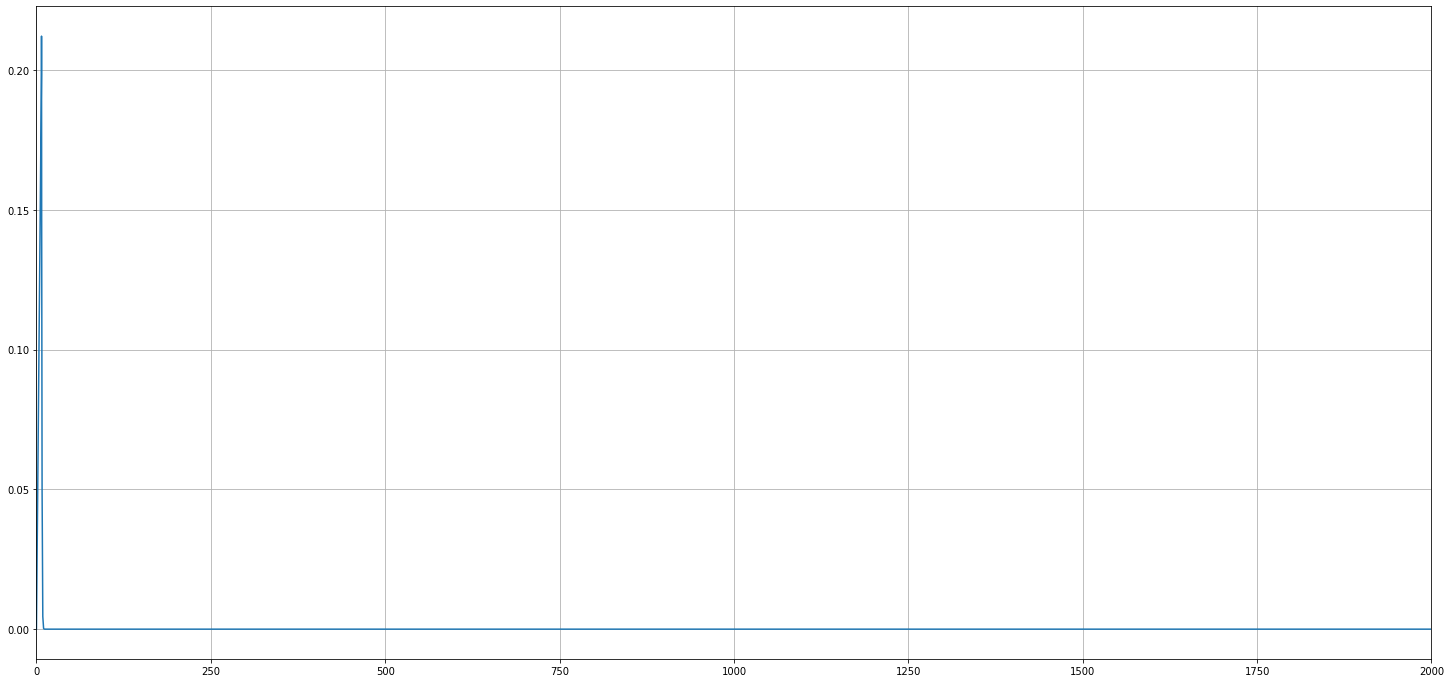

In [9]:
last_time = array[-1]
time, rk, vk = last_time
print(vk)

plt.plot(rk, vk)
plt.xlim([0, 2000])
plt.grid()